# Riesgo por incumplimiento de pagos en créditos de vivienda
---------------------------------------------------------------------------------------------------------------------------

**Autor:** Cristhian David Tafur Hernández

**Asesor:** Raul Ramos


Notebook: 03 Evaluación de hiperparámetros y selección del mejor modelo

Objetivo de la Iteración:

 
Esta iteración busca evaluar los mejores hperparámetros en los algoritmos de clasificación logística y de bosques aleatorios. Luego de obtener los mejores modelos de cada algoritmo seleccionar uno para continuar con el mismo en las siguientes iteraciones.


## Preparación de entorno de trabajo

In [ ]:
# Básicas
# ==============================================================================
import pandas as pd
import numpy as np

# Preporcesamiento de datos
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Elección de hiperparametros
# ==============================================================================
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold


# Modelamiento
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Graficación
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_lectura ='/content/drive/MyDrive/Monografia/data_modelo/'

## 00. Lectura de datos procesados para los modelos

In [ ]:
print('Distribución del target: Data train estratificada')

X_train = pd.read_csv (ruta_lectura + 'X_train.csv', header=None)
y_train = pd.read_csv (ruta_lectura + 'y_train.csv', header=None)
X_train = np.array(X_train)
y_train = np.array(y_train).reshape((-1))


X_test = pd.read_csv (ruta_lectura + 'X_test.csv', header=None)
y_test = pd.read_csv (ruta_lectura + 'y_test.csv', header=None)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape((-1))

Distribución del target: Data train estratificada


## 01. Evaluación sobre modelos de clasificación

Se usan los algoritmos de regresión logística y bosques aleatorios de clasificación 

In [ ]:
#definimos funciona para mostrar los resultados

def mostrar_resultados(y_test, x_test, model_fit, normalize = None):
    pred_y = model_fit.predict(x_test)
    disp = plot_confusion_matrix(model_fit, x_test, y_test,
                             cmap=plt.cm.Blues, 
                             normalize=normalize)
    
    disp.ax_.set_title('MC normalizada')
    plt.show()
    print ('--------------------------------------------------------------------')
    print (classification_report(y_test, pred_y))

In [ ]:
st = StratifiedKFold(n_splits=5, shuffle = False)

### A. Regresión logística

In [ ]:
logit = LogisticRegression(random_state=0)

penalty_test = ['l1', 'l2', 'elasticnet', 'none']
c_test = [1, 0.5, 2]
class_weight_test = ['balanced', {0:1, 1:5}, {0:1, 1:10}]

parameters = {'penalty':penalty_test, 'C':c_test, 'class_weight': class_weight_test }
cf_logit = GridSearchCV(estimator=logit, param_grid = parameters, cv=st, scoring='balanced_accuracy',return_train_score=True)

In [ ]:
cf_logit.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 0.5, 2],
                         'class_weight': ['balanced', {0: 1, 1: 5},
                                          {0: 1, 1: 10}],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             return_train_score=True, scoring='balanced_accuracy')

In [ ]:
cf_logit.best_estimator_

LogisticRegression(C=1, class_weight='balanced', penalty='none', random_state=0)

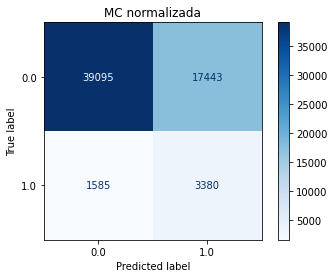

--------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     56538
         1.0       0.16      0.68      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.69      0.53     61503
weighted avg       0.90      0.69      0.76     61503



In [ ]:
mostrar_resultados(y_test, X_test, cf_logit)

### B. Implementación del Modelo:  Random Forest


In [ ]:
rf = RandomForestClassifier(random_state=0)
test_n_estimators = [50,100,200]
test_max_depth = [10,12,14]
class_weight_test = ['balanced_subsample', {0:1, 1:5}, {0:1, 1:10}]

parameters = {'n_estimators':test_n_estimators, 'max_depth': test_max_depth, 'class_weight':class_weight_test}

cf_rf = GridSearchCV(estimator=rf, param_grid = parameters, cv=st, scoring='balanced_accuracy',return_train_score=True)

In [ ]:
cf_rf.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced_subsample', {0: 1, 1: 5},
                                          {0: 1, 1: 10}],
                         'max_depth': [10, 12, 14],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='balanced_accuracy')

In [ ]:
cf_rf.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       n_estimators=200, random_state=0)

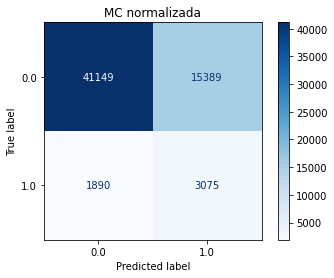

--------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83     56538
         1.0       0.17      0.62      0.26      4965

    accuracy                           0.72     61503
   macro avg       0.56      0.67      0.54     61503
weighted avg       0.89      0.72      0.78     61503



In [ ]:
mostrar_resultados(y_test, X_test, cf_rf)

# Conclusión de la iteración:

Al confrontar los mejores modelos identificados de acuerdo a las combinaciones de hiperparámetros evaluadas, se observa que el algoritmo de bosques aleatorios de clasificación tiene un mejor desempeño que el de regresión logística.